### Explore some eye tracking data (saccades) see how it is formatted, what it can be used for

In [13]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from constants.glm_constants import *
from constants.behavioral_constants import *

import seaborn as sns

In [3]:
sess_name = "20180802"
saccades_path = f"/data/rawdata/sub-SA/sess-{sess_name}/behavior/sub-SA_sess-{sess_name}_saccades.csv"
saccades = pd.read_csv(saccades_path)

In [4]:
saccades

,Unnamed: 0,trial,interval,obj_start,obj_end,distance,direction,stereotypical,time_start,time_end,time_peak,fix_len,fix_std_x,fix_std_y,x_start,y_start,x_end,y_end,pupil_start,pupil_end
0,0,-1,no_task,-,-,16.795634,129.228218,0,47495,47512,47499,152,0.036565,0.036565,15.026804,-17.634860,4.421759,-4.647072,-0.057029,-0.060303
1,1,-1,no_task,-,-,6.968668,134.493032,0,47664,47687,47673,2085,0.234315,0.234315,4.374800,-5.444276,-0.493346,-0.704036,-0.063045,-0.063929
2,2,-1,no_task,-,-,41.406025,-144.198704,0,49772,49803,49793,114,0.002944,0.002944,0.017992,-0.217507,-33.654656,-24.452130,-0.067299,-0.080328
3,3,-1,no_task,-,-,18.318783,-0.190063,0,49917,49957,49933,883,0.488146,0.488146,-33.659874,-24.456038,-15.447373,-24.456038,-0.077477,-0.069510
4,4,-1,no_task,-,-,27.194048,0.000823,0,50840,50898,50865,295,0.239203,0.239203,-14.818636,-24.454084,12.712739,-24.454084,-0.064257,-0.064632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42993,42993,-1,no_task,-,-,18.890329,-84.914835,0,14175396,14175436,14175408,279,0.113439,0.113439,5.856636,12.576842,7.591533,-6.372394,-0.069026,-0.067223
42994,42994,-1,no_task,-,-,22.769532,-174.300451,0,14175715,14175757,14175736,11,0.133970,0.133970,7.210638,-5.540019,-16.047412,-7.847613,-0.060087,-0.058900
42995,42995,-1,no_task,-,-,0.353903,-164.468190,0,14175768,14175772,14175772,547,0.053408,0.053408,-15.961319,-7.687391,-16.412653,-7.820258,-0.058784,-0.058864
42996,42996,-1,no_task,-,-,24.117217,6.411905,0,14176319,14176373,14176340,234,0.076753,0.076753,-16.608318,-7.157875,7.750674,-4.492711,-0.056217,-0.056905


In [18]:
import h5py
from scipy.fft import fft, ifft

f =h5py.File('/data/rawdata/sub-SA/sess-20180802/lfp/sub-SA_sess-20180802_chan-66.mat', 'r')
data = f["data"]

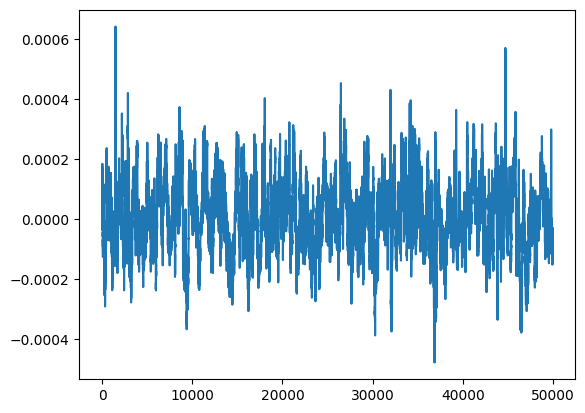

In [17]:
plt.plot(data[0, 100000:150000])

In [22]:
data = np.array(data)

In [24]:
ft = fft(data)

In [26]:
ft.shape

(1, 14176877)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


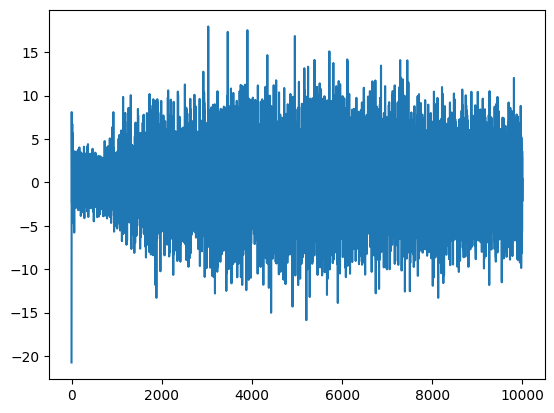

In [28]:
plt.plot(ft[0, :10000])